In [10]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 


ConnectionError: Error connecting to server

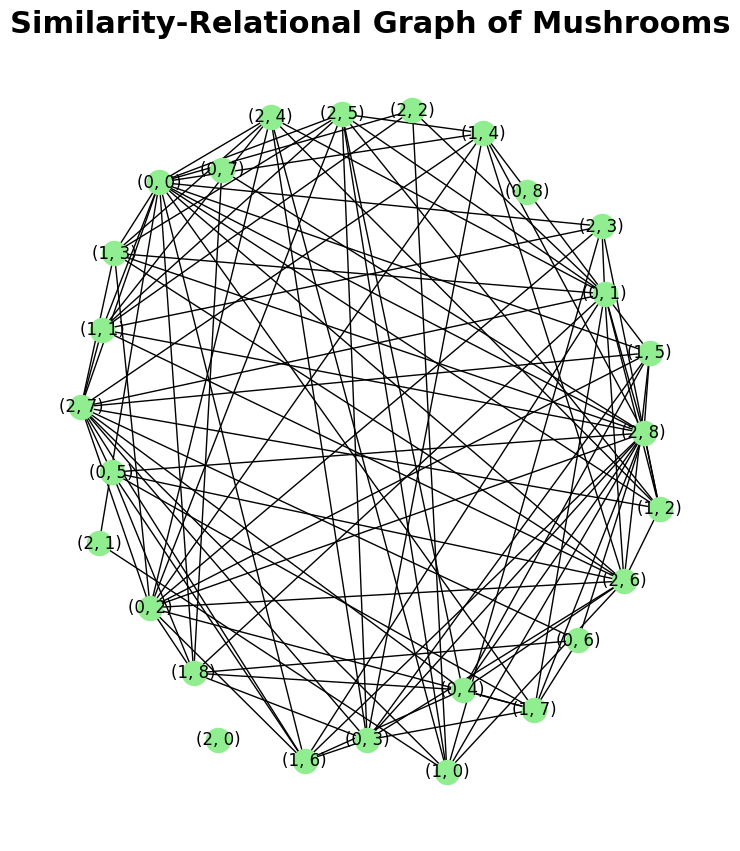

C:\Users\castr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:662: UserWarning: Nearest neighbors affinity currently does not support sparse input, falling back to rbf affinity
  warnings.warn(


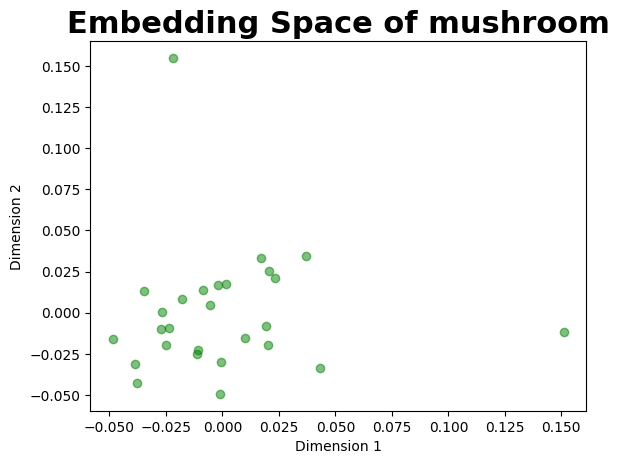

Embedding Matrix:
 [[ 0.15104927 -0.01157859]
 [ 0.01921786 -0.00788617]
 [ 0.0230478   0.02126566]
 [-0.00060467 -0.02999747]
 [-0.03491974  0.01332622]
 [-0.02357229 -0.0094162 ]
 [ 0.04298431 -0.03339842]
 [ 0.01995202 -0.01939259]
 [-0.03880071 -0.03143967]
 [-0.01102347 -0.02288206]
 [-0.03791241 -0.04261284]
 [ 0.03685434  0.03429662]
 [ 0.00177168  0.01744394]
 [-0.01805805  0.00826578]
 [ 0.02042166  0.02549664]
 [-0.0009208  -0.04938933]
 [-0.00862027  0.0139081 ]
 [-0.04851206 -0.01583809]
 [ 0.01013884 -0.01529427]
 [-0.02493785 -0.01987513]
 [-0.01135533 -0.02536214]
 [ 0.01724245  0.03329902]
 [-0.02185562  0.15481385]
 [-0.00556994  0.0045776 ]
 [-0.00192249  0.0167873 ]
 [-0.02726451 -0.00967411]
 [-0.02683     0.00055637]]


In [11]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import OneHotEncoder
import networkx as nx
import matplotlib.pyplot as plt

def construct_similarity_graph(X):

    # Initialize an empty graph
    G = nx.Graph()
    
    # Perform one-hot encoding to convert categorical values to numerical
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(X).toarray()
    
    # Compute pairwise cosine similarity between categorical values
    similarity_matrix = cosine_similarity(X_encoded)
    
    # Add nodes to the graph
    n_samples, n_features = X_encoded.shape
    for i in range(n_samples):
        for j in range(n_features):
            G.add_node((i, j))
    
    # Add edges to the graph based on cosine similarity
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            for k in range(n_features):
                for l in range(k+1, n_features):
                    sim = similarity_matrix[i, j]
                    G.add_edge((i, k), (j, l), weight=sim)
    
    return G

def graph_embedding(X, embedding_dim=2):

    # Construct similarity-relational graph
    G = construct_similarity_graph(X)
    
    # Visualize the graph
    plt.figure(figsize=(7, 8))
    nx.draw(G, with_labels=True, node_color='lightgreen')
    plt.title('Similarity-Relational Graph of Mushrooms', fontweight='bold', fontsize=22)
    plt.show()
    
    # Perform spectral embedding to learn the representation of nodes
    spectral_embedding = SpectralEmbedding(n_components=embedding_dim)
    embedding_matrix = spectral_embedding.fit_transform(nx.adjacency_matrix(G))
    
    # Visualize the embedding space

    plt.scatter(embedding_matrix[:,0], embedding_matrix[:,1], color='green', alpha=0.5)
    plt.title('Embedding Space of mushroom', fontweight='bold', fontsize=22)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()
    
    return embedding_matrix

# Assuming X is your categorical data matrix
X = np.array([
    ['A', 'B', 'C'],
    ['D', 'E', 'F'],
    ['G', 'H', 'I']
])

# Perform graph embedding
embedding_matrix = graph_embedding(X)
print("Embedding Matrix:\n", embedding_matrix)


ADVANTAGES:

FMI- In comparison with ARI and NMI, it is easier to understand and requires less computing power.
NMI - Suitable for comparing clusterings with different numbers of clusters and sizes.
ARI - Adjusts for chance and therefore, more reliable than the Rand Index for comparing clusterings with different numbers of clusters.

DISADVANTAGES:
FMI - Does not adjust for chance and can be sensitive to the number of clusters.
NMI - Compared to ARI, it is occasionally less intuitive to interpret.
ARI - Can be costly to compute for huge datasets.

WHEN TO USE:

FMI - 
NMI - 
ARI - 